# Properly Fitting Models
<img src="../images/xkcd_overfitting.png" width="550" />

## Demo
Let's run through a toy example of how you might run into problems fitting a model.

In [172]:
# Imports
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

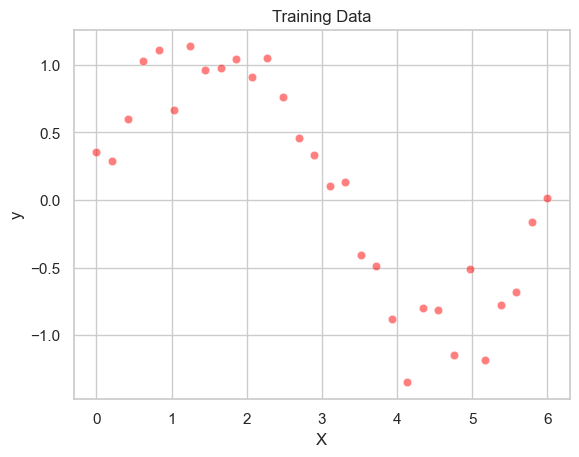

In [197]:
# Generate some dummy data
np.random.seed(0)
X_train = np.linspace(0, 6, 30).reshape(-1, 1)
y_train = np.sin(X_train) + np.random.normal(0, 0.2, X_train.shape)
X_test = np.linspace(0, 6, 10).reshape(-1, 1)
y_test = np.sin(X_test) + np.random.normal(0, 0.15, X_test.shape)

# Plot the data
sns.set(style="whitegrid")
sns.scatterplot(x=X_train.flatten(), y=y_train.flatten(), color='red', alpha=0.5)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Training Data')
plt.show()

### Goal
We want to create a model to predict $y$ from $X$. Let's try to fit a linear regression model.

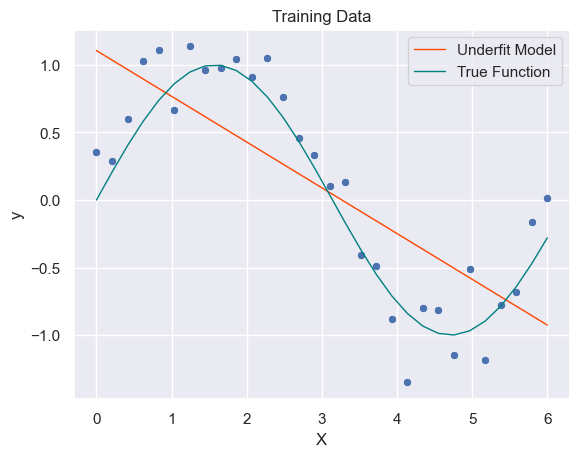

----- Model Evaluation -----
Coefficient of determination (R^2): 0.45
Mean squared error (MSE): 0.20


In [192]:
# Fit a linear regression model on the data
model1 = LinearRegression()
model1.fit(X_train, y_train)

# Plot the training data alongside the regression line
sns.set_theme()
sns.scatterplot(x=X_train.flatten(), y=y_train.flatten())
plt.plot(X_train, model1.predict(X_train), color='orangered', label='Underfit Model', linewidth=1)
plt.plot(X_train, np.sin(X_train), color='teal', label='True Function', linewidth=1)
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Training Data')
plt.show()

# Evaluate our model
print('----- Model Evaluation -----')
y_pred = model1.predict(X_test)
print("Coefficient of determination (R^2): %.2f" % r2_score(y_test, y_pred))
print("Mean squared error (MSE): %.2f" % mean_squared_error(y_test, y_pred))

### What's the issue?
The simple linear model we have chosen is not capturing the true underlying pattern of the data, which is clearly non-linear.

Our model was too simple to capture the true nature of the data. This is called <u>**underfitting**</u> the model.

### Now what?
Well, if we are lacking complexity in our model, let's account for that. One common approach is to transform our features while still using a linear model.

Instead of only using $x$ as a single feature, let's use $x, x^2, x^3, \dots, x^{100}.$ The more features, the better, right?

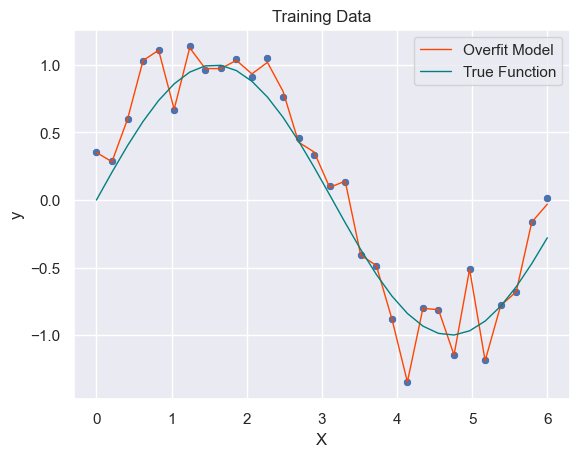

----- Model Evaluation -----
Coefficient of determination (R^2): -19633056960.17
Mean squared error (MSE): 7038568332.62


In [193]:

# Fit the model using polynomial features
polynomial_features = PolynomialFeatures(degree=100, include_bias=False)
linear_regression = LinearRegression()
model2 = Pipeline(
    [
        ("polynomial_features", polynomial_features),
        ("standardization", StandardScaler()),
        ("linear_regression", linear_regression),
    ]
)
model2.fit(X_train, y_train)

# Plot the training data alongside the regression line
sns.set_theme()
sns.scatterplot(x=X_train.flatten(), y=y_train.flatten())
plt.plot(X_train, model2.predict(X_train), color='orangered', label='Overfit Model', linewidth=1)
plt.plot(X_train, np.sin(X_train), color='teal', label='True Function', linewidth=1)
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Training Data')
plt.show()

# Evaluate our model
print('----- Model Evaluation -----')
y_pred = model2.predict(X_test)
print("Coefficient of determination (R^2): %.2f" % r2_score(y_test, y_pred))
print("Mean squared error (MSE): %.2f" % mean_squared_error(y_test, y_pred))

### What's the issue?
Our model almost perfect predicts the training data, so why is our error so high on the testing data?

Our model was too complex, capturing the noise in the training data. This is called <u>**overfitting**</u> the model.

### Now what?
Well, there are a few options. Let's look at two:
1. Reducing the polynomial degree of our features
2. Regularizing our model (e.g. Ridge regression)

#### Reducing the polynomial degree of our features
Why don't we just reduce our degree to something more reasonable? Let's try 3 ($x$, $x^2$, and $x^3$).

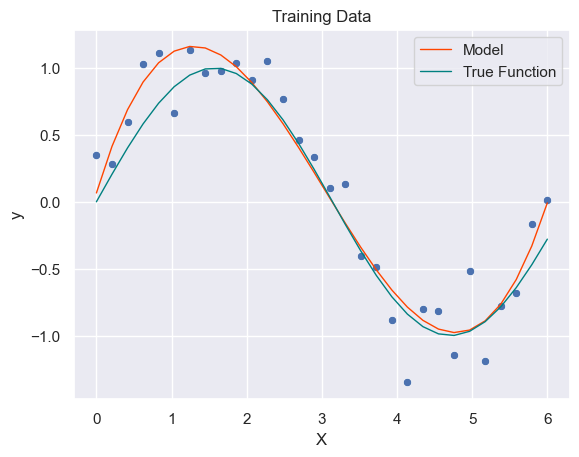

----- Model Evaluation -----
Coefficient of determination (R^2): 0.88
Mean squared error (MSE): 0.04


In [194]:
# Fit the model using polynomial features
polynomial_features = PolynomialFeatures(degree=3, include_bias=False)
linear_regression = LinearRegression()
model3 = Pipeline(
    [
        ("polynomial_features", polynomial_features),
        ("standardization", StandardScaler()),
        ("linear_regression", linear_regression),
    ]
)
model3.fit(X_train, y_train)

# Plot the training data alongside the regression line
sns.set_theme()
sns.scatterplot(x=X_train.flatten(), y=y_train.flatten())
plt.plot(X_train, model3.predict(X_train), color='orangered', label='Model', linewidth=1)
plt.plot(X_train, np.sin(X_train), color='teal', label='True Function', linewidth=1)
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Training Data')
plt.show()

# Evaluate our model
print('----- Model Evaluation -----')
y_pred = model3.predict(X_test)
print("Coefficient of determination (R^2): %.2f" % r2_score(y_test, y_pred))
print("Mean squared error (MSE): %.2f" % mean_squared_error(y_test, y_pred))

#### Regularizing our model (e.g. Ridge regression)
Alternatively, we can keep all of our polynomial features and simply regularize the model to simplify our model and prevent overfitting. Ridge regression is one method of doing this.

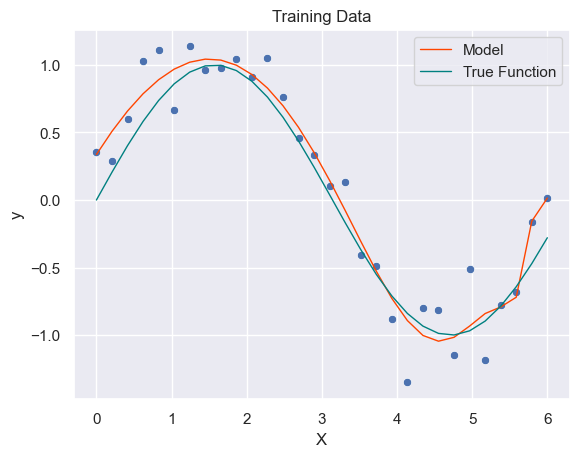

----- Model Evaluation -----
Coefficient of determination (R^2): 0.86
Mean squared error (MSE): 0.05


In [196]:
# Fit the model using polynomial features
polynomial_features = PolynomialFeatures(degree=100, include_bias=False)
linear_regression = Ridge(alpha=0.01)
model4 = Pipeline(
    [
        ("polynomial_features", polynomial_features),
        ("standardization", StandardScaler()),
        ("linear_regression", linear_regression),
    ]
)
model4.fit(X_train, y_train)

# Plot the training data alongside the regression line
sns.set_theme()
sns.scatterplot(x=X_train.flatten(), y=y_train.flatten())
plt.plot(X_train, model4.predict(X_train), color='orangered', label='Model', linewidth=1)
plt.plot(X_train, np.sin(X_train), color='teal', label='True Function', linewidth=1)
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Training Data')
plt.show()

# Evaluate our model
print('----- Model Evaluation -----')
y_pred = model4.predict(X_test)
print("Coefficient of determination (R^2): %.2f" % r2_score(y_test, y_pred))
print("Mean squared error (MSE): %.2f" % mean_squared_error(y_test, y_pred))

## Summary
An <u>**underfit**</u> model is too simple to capture the underlying pattern in the data. The telltale symptom is when the model performs poorly on both training and testing data.<br>
Remedies:
- Increase model complexity
- Add more features
- Gather more training data

An <u>**overfit**</u> model is too complex and cpatures the noise in the data. The telltale symptom is when the model performs much better on the training data than the testing data.<br>
Remedies:
- Decrease model complexity (e.g. regularization)
- Use feature selection
- Employ cross-validation to detect and mitigate